# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [48]:
data = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [49]:
# let's rename our columns to make them more intuitive
data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# Remove all rows with at least 1 nan
data.dropna()

# We are interested in Grade 4 Reading
# So, drop all the rows where the 4th grading reading score is missing
data.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

# The average error between estimated and actual enrollment is ~2%, so
# fill in the missing estimates 
data["ENROLL_ALL_EST"] = data["ENROLL_ALL_EST"].fillna(data["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Reading

How many years of data are logged in our dataset? 

In [50]:
# .nunique() does not count repeats
print(data["YEAR"].nunique())

14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [51]:
# This shows that Ohio has the higher average reading score for Grade 4 across all years
# Set the index to then use loc on the specified series of state names
data_ = data.set_index('STATE')
data_.loc['MICHIGAN']['AVG_READING_4_SCORE'].mean() < data_.loc['OHIO']['AVG_READING_4_SCORE'].mean()

True

Find the average for your outcome score across all states in 2019

In [52]:
# Set the index to YEAR so that we can access all states in the year 2019
data_ = data.set_index('YEAR')
data_.loc[2019]['AVG_READING_4_SCORE'].mean()

219.79245283018867

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [53]:
# .max() is used to find the maximum outcome score for average grade 4 reading score within each state.
data.groupby('STATE')['AVG_READING_4_SCORE'].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [54]:
# This creates a new column which represents expenditure per student in regards to support services
data['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = data['SUPPORT_SERVICES_EXPENDITURE'] / data['ENROLL_ALL']

# This creates a new column which represents expenditure per student in regards to instruction services
data['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = data['INSTRUCTION_EXPENDITURE'] / data['ENROLL_ALL']

# This creates a new column which represents expenditure per student in regards to instruction services
data['STATE_REVENUE_PER_STUDENT'] = data['STATE_REVENUE'] / data['ENROLL_ALL']

# This creates a new column which represents expenditure per student in regards to instruction services
data['TOTAL_REVENUE_PER_STUDENT'] = data['TOTAL_REVENUE'] / data['ENROLL_ALL']


Feature engineering justification: **Our data is on the state level and it also looks at multiple different years over time. Thus, we want to see how much each state spends on support services PER STUDENT rather than overall because some states will
have more students than others. If we did not do this, a state with more students may seem like they are spending more on services for their students when they are not. The same was done for instruction expenditures per student and revenue per student.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/home/ehoch/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '4th Grade Reading Score')

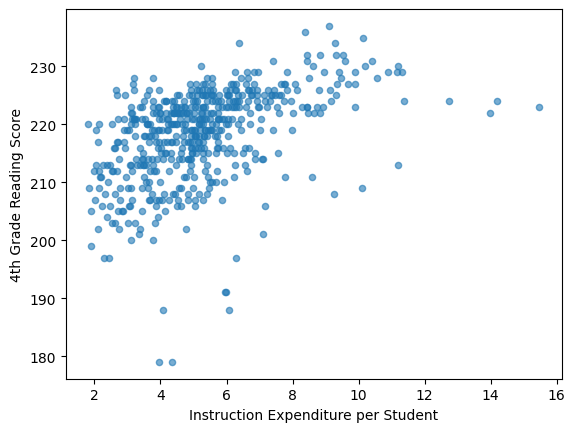

In [55]:
data.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('4th Grade Reading Score')

**This scatter plot demonstrates that instruction expenditure per student is not the best predictor for 4th grade reading scores. Their is a sligh positive linear trend indicating that reading score are increasing as instruction expenditure per student goes up, but there seem to be many outliers that offset the trend.**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

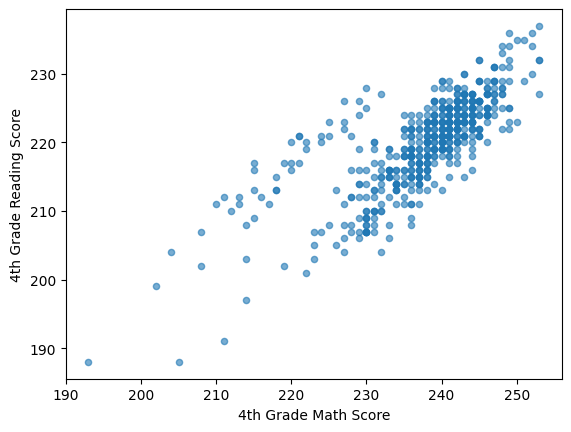

In [56]:
data.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

**Fourth grade math score is a good predictor for fourth grade reading score. There is a strong linear association between the two variables. As math scores increase, so do reading scores. There is an overall positive linear association, but the data is not as strongly associated for lower scores.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [57]:
# test_train_split randomly splits the data into two parts, one for training the model and one for testing
from sklearn.model_selection import train_test_split

In [58]:
# X denotes the input data
# y denotes the response / output data
X = data[['ENROLL_4','AVG_MATH_4_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = data.loc[X.index]['AVG_READING_4_SCORE']
# fill the NaN with the median of y 
y.fillna(y.median(), inplace=True)

In [59]:
# We are using a 70 / 30 train / test split. 
# setting random_state explicitly ensures that I get the same results each time I run the code
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [60]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [61]:
# create your model here
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [64]:
# mean error
print(np.mean(model.predict(X_test)-y_test))
# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
# root mean squared error -- penalizes large errors
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
print(model.score(X_test, y_test))

0.42331311293740487
3.862667110881385
4.97220098867298
0.6244878272753285


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

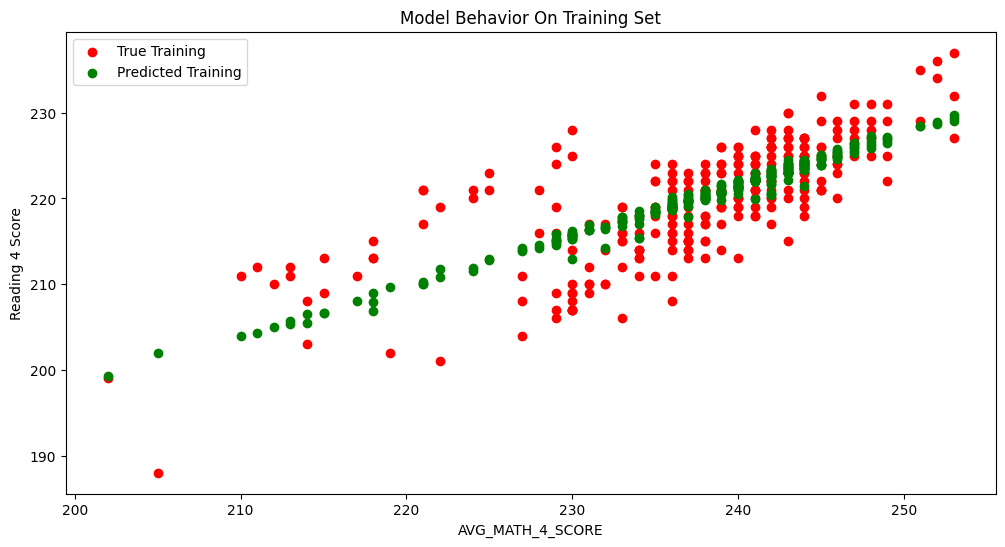

In [65]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

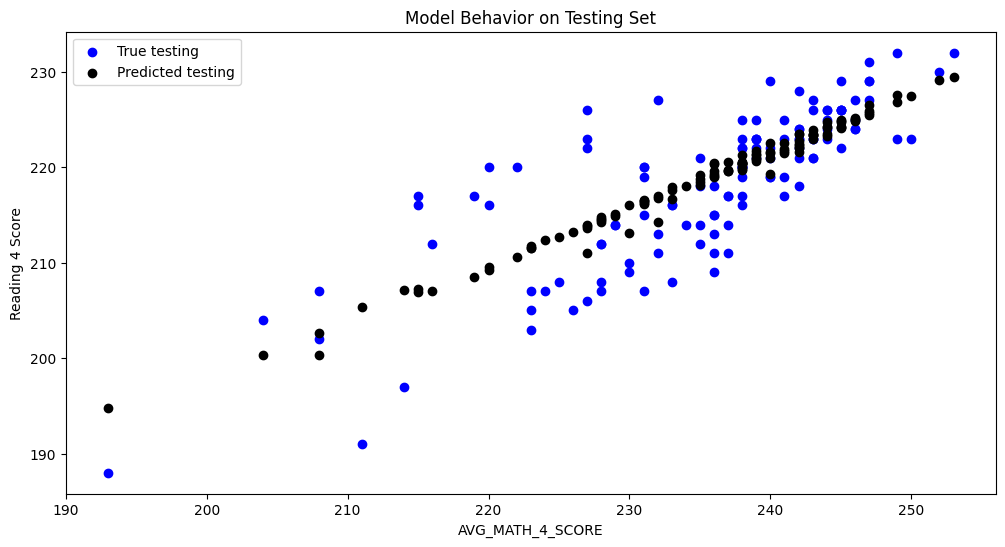

In [66]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**The response variable I focused on was grade 4 reading score with instruction expenditure per student and grade 4 average math score as predictors. Using sklearn's LinearRegression class, I generated a training model that uses the average grade 4 math scores as the predictor to learn patterns. I then generated a testing model to ensure that the model performs well on data is has not seen before. The predicted training follows the true training well, and the model generalizes to the testing set. This is least squares linear regression which is trying to minimize the residual sum of squares. The models indicate that grade 4 reading scores can be predicted using grade 4 math scores, but it seems to be more fitting at higher scores. The root mean squared error of 4.97 is fairly low indicating that the model is a good fit to the dataset. 
**